## Test!

In [1]:
library(tidyverse)
library(tidygraph)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'tibble' was built under R version 4.0.3"
Warning message:
"package 'readr' was built under R version 4.0.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'tidygraph'


The following object is masked from 'package:stats':

    filter




In [3]:
from <- c("Kim", "Tim", "Kim", "Jim")
to <- c("Jim", "Jim", "Jane", "Jane")

In [4]:
edge1 <- tibble(from, to)
str(edge1)

tibble [4 x 2] (S3: tbl_df/tbl/data.frame)
 $ from: chr [1:4] "Kim" "Tim" "Kim" "Jim"
 $ to  : chr [1:4] "Jim" "Jim" "Jane" "Jane"


In [5]:
Talk <- tbl_graph(edges = edge1,
                 directed = FALSE)
Talk

# A tbl_graph: 4 nodes and 4 edges
#
# An undirected simple graph with 1 component
#
# Node Data: 4 x 1 (active)
  name 
  <chr>
1 Kim  
2 Jim  
3 Tim  
4 Jane 
#
# Edge Data: 4 x 2
   from    to
  <int> <int>
1     1     2
2     2     3
3     1     4
# ... with 1 more row

In [6]:
class(Talk)

[1] "tbl_graph" "igraph"

In [7]:
Talk %>% 
    activate(edges) %>% 
    as_tibble()

from to
1 1    2 
2 2    3 
3 1    4 
4 2    4

In [8]:
class(Talk)

[1] "tbl_graph" "igraph"

In [9]:
Talk %>%
    activate(nodes) %>%
    as_tibble()

name
1 Kim 
2 Jim 
3 Tim 
4 Jane

In [10]:
library(intergraph)
Talk_n <- asNetwork(Talk) 
Talk_n

 Network attributes:
  vertices = 4 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 4 
    missing edges= 0 
    non-missing edges= 4 

 Vertex attribute names: 
    vertex.names 

No edge attributes

In [11]:
class(Talk_n)

[1] "network"

In [12]:
library(ggnetwork)
Talk_g <- ggnetwork(Talk_n)
class(Talk_g)

[1] "data.frame"

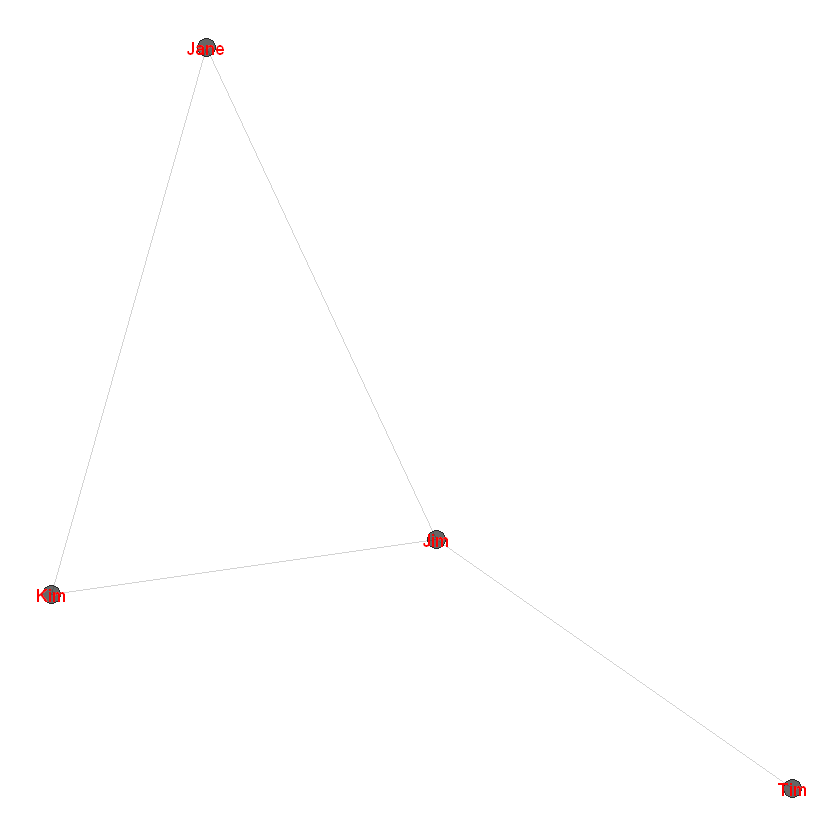

In [14]:
Talk_GG <- ggplot(Talk_g, aes(x, y, xend = xend,
                             yend = yend))+
    geom_edges(color = 'lightgrey')+
    geom_nodes(alpha = 0.6, size = 5)+
    geom_nodetext(aes(label = vertex.names),
                 col = 'red')+
    theme_blank()
Talk_GG

In [15]:
ggnetplot <- function(Net = Bali){
    Net <- ggnetwork(Net, layout = 'kamadakawai')
    ggplot(Net, aes(x,y, xend = xend, yend = yend)) +
    geom_edges(col = 'tomato')+
    # node text repelled from node
    geom_nodetext_repel(aes(label = vertex.names),
                       col = 'blue')+
    theme_blank()
}

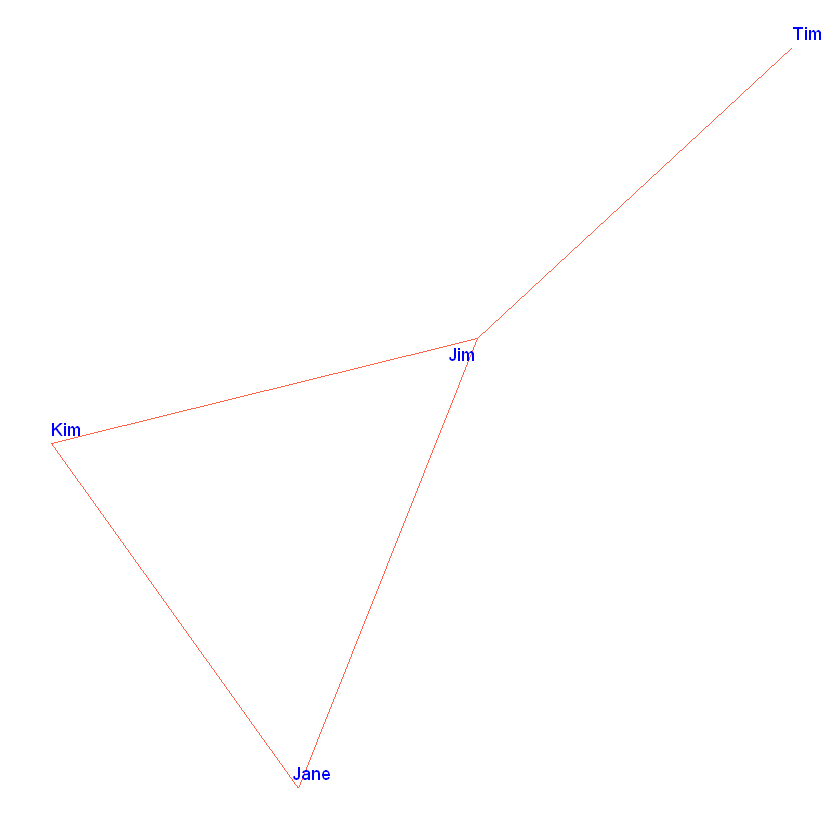

In [16]:
ggnetplot(Talk_n)